# Combining Data

結合資料有很多方法，且隨著資料不同而有所不同，這裡我們練習結合以下兩個來自　World Bank Indicators data　的資料
* [rural_population_percent.csv](https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS) - 鄉村人口比例
* [electricity_access_percent.csv](https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS) - 能使用電力的人口比例

## Main tools 
- [Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

### 1. Combine the two data sets using the [pandas concat method](https://pandas.pydata.org/pandas-docs/stable/merging.html)

In [1]:
# import the pandas library
import pandas as pd
# read in each csv file into a separate variable
df_rural = pd.read_csv('../data/rural_population_percent.csv', skiprows=4)
df_electricity = pd.read_csv('../data/electricity_access_percent.csv', skiprows=4)

# remove the 'Unnamed:62' column from each data set
df_rural = df_rural.drop('Unnamed: 62', axis=1)
df_electricity = df_electricity.drop('Unnamed: 62', axis=1)

# combine the two data sets together using the concat method
# all of the rows of df_rural will come first followed by all the rows in df_electricity.
df_concat = pd.concat([df_rural, df_electricity], axis=0)
# df_rural.shape = (264, 62)
df_concat[262:266]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,62.125000,61.701000,61.275000,60.847000,60.413000,59.973000,59.528000,59.078000,58.621000,58.160
263,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,87.392,87.179,86.918,86.422,85.908,85.380,...,66.440000,66.622000,66.804000,66.985000,67.166000,67.346000,67.499000,67.624000,67.723000,67.793
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN


### 2. Combine the two datas in the csv file together so that the output looks like the following:

|Country Name|Country Code|Year|Rural_Value|Electricity_Value|
|------|------|------|------|------|
|Aruba|ABW|1960|49.224|49.239|
... etc.

Order the results in the dataframe by country and then by year

Here are a few pandas methods that should be helpful:
* [melt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)
* [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
* [merge](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.merge.html)
* [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [2]:
# use the melt method to change the formatting of each data frame so that it looks like this:
# Country Name, Country Code, Year, Rural Value
# Country Name, Country Code, Year, Electricity Value
df_rural_melt = pd.melt(df_rural, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',
                    value_name='Rural Value')
df_electricity_melt = pd.melt(df_electricity, 
                              id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                              var_name='Year',
                              value_name='Electricity Value')

# drop any columns from the data frames that aren't needed
df_rural_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_electricity_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# merge the data frames together based on their common columns
df_merge = df_rural_melt.merge(df_electricity_melt, 
                               how='inner',
                               on=['Country Name', 'Country Code', 'Year'])

# sort the results by country and then by year
df_combined = df_merge.sort_values(['Country Name', 'Year'])
df_combined.head()

,Country Name,Country Code,Year,Rural Value,Electricity Value
1,Afghanistan,AFG,1960,91.779,NaN
265,Afghanistan,AFG,1961,91.492,NaN
529,Afghanistan,AFG,1962,91.195,NaN
793,Afghanistan,AFG,1963,90.890,NaN
1057,Afghanistan,AFG,1964,90.574,NaN


# Cleaning Data

拿到資料第一件事就是要告訴自己仔細審視並找出錯誤，錯誤較常來自
- entry mistakes
- data duplicates
- incomplete records
- inconsistencies

每個資料都有自己的問題，族繁不及備載，這裡舉例 word bank indicator 和 projects data set 中 Country Name 不一致但需要結合的狀況。

### Step 1 -  探索資料

In [3]:
# read in the population data and drop the final column
df_indicator = pd.read_csv('../data/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [4]:
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
5,Arab World,ARB
6,United Arab Emirates,ARE
7,Argentina,ARG
8,Armenia,ARM
9,American Samoa,ASM


> 上面是 population indicator data set 中 unique 的 country names 和 ISO abbreviations，注意有些是區域如 'East Asia & Pacific'

In [5]:
df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

> 上面是 project data set 中 unique 的 country names，與 population indicator 比較可以發現，如果兩個資料都有 ISO 國家簡寫應該會比較容易把它們結合，目前有兩條路可以選擇：
- 在 projects data set 加入一欄 ISO 3 codes。
- 找到兩個資料中 country names 的不同處，清理它們使它們相同。

### Step 2 - 使用 Pycountry library
由上面可以注意到 projects data 的 country names 具有使用；隔開相同國家名稱的模式，我們首先把；和重複的部分移除

In [6]:
# create a new column called 'Official Country Name' so that the country name only appears once. 
df_projects['Official Country Name'] = df_projects['countryname'].apply(lambda col: col.split(';')[0])

接下來使用 pycountry library 來找出國家的簡寫

In [7]:
# install and import the pycountry library
!pip install pycountry
from pycountry import countries

In [8]:
# Run this code cell to see an example of how the library works
countries.get(name='Spain')

Country(alpha_2='ES', alpha_3='ESP', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [9]:
# Run this code cell to see how you can also look up countries without specifying the key
countries.lookup('Kingdom of Spain')

Country(alpha_2='ES', alpha_3='ESP', name='Spain', numeric='724', official_name='Kingdom of Spain')

目標為把 ISO codes 加入 projects data set，首先使用　pycountry library　創造一個dictionary 來儲存 Official Country Name 中 unique 的國家的 ISO code，並另外記錄不在 pycountry library 中的國家。

In [10]:
# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

### Step 3 - 手動對應
由上面可以看出還是有國家沒有對應到縮寫，為了要把兩個資料結合，我們首先看看同時存在於 indicator data set 的 Country Name 中且沒有找到縮寫的國家

In [11]:
# iterate through the country_not_found list and check if the country name is in the df_indicator data set
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


不幸的是只有 6 個國家可以用 Country Name 對應，所以我們只能繼續走創造 ISO code 這條路。

接下來我們利用自創的 dictionary 手動將沒找到縮寫的國家對應到它們的縮寫

In [12]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

In [13]:
# Update the project_country_abbrev_dict with the country_not_found_mapping dictionary
project_country_abbrev_dict.update(country_not_found_mapping)

### Step 4 - 創造 'Country Code' Column

In [14]:
# Use the project_country_abbrev_dict and the df_projects['Official Country Name'] column to make a new column
# of the alpha-3 country codes. This new column should be called 'Country Code'.

df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda col: project_country_abbrev_dict[col])

In [15]:
# see which projects in the df_projects data frame still have no country code abbreviation.

df_projects[df_projects['Country Code'] == '']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code
31,P166648,Africa,Central Africa;Central Africa,RE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Africa,
39,P163752,Africa,Africa;Africa,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
58,P164728,Africa,Africa;Africa,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
69,P161329,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
103,P164468,East Asia and Pacific,Pacific Islands;Pacific Islands,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,0002134431!$!Republic of Vanuatu!$!-16!$!167!$...,0002134431;0002135171,Republic of Vanuatu;Port-Vila,-16;-17.73381,167;168.32188,VU;VU,Pacific Islands,
123,P161163,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
124,P161368,Africa,Africa;Africa,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,0000239880!$!Central African Republic!$!7!$!21...,0000239880;0002233387;0002260494;0002309096;00...,Central African Republic;Republic of Cameroon;...,7;6;-1;1.7;-1;15,21;12.5;15.5;10.5;11.75;19,CF;CM;CG;GQ;GA;TD,Africa,
139,P161836,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,B,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
157,P162337,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
158,P163945,Africa,Western Africa;Western Africa,GE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,


> 可以注意到還有 591 個 entries 沒有國家縮寫，其中包含了像是"Africa"等區域，還有在1990年代已經消失的國家 "Yugoslavia"

### 結論
目前 df_projects 和 df_indicator 已經有對應的欄 'Country Code'，但還不能將它們合併，因為每個 project 還有日期欄位，我們想要把兩個資料依照時間合併，所以還需要更多的轉換。

# Data Types
讀進資料時，pandas 會猜測資料的型態，但有時候會失敗，projects data 就遇到了這個問題，所以才使用以下方式把所有欄位的型態都設成 string
``` python
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
```

In [16]:
# Check indicator data type
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995        

> 可以看出 df_indicator 的資料型態是正確的，我們可以對 float64 的欄位做數學運算

In [17]:
# Check project data type
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

> df_projects 大部分資料型態本該就是 object，但像是`boardapprovaldate` 應該是 datetime 而 `totalamt` 應該是 integer，我們首先處理 `totalamt`，主要有兩種方法
1. `pd.read_csv(path, dtype={'totalamt': int64, ...})` 或 `pd.read_csv(path, thousands=',')`，但因為 df_projects 有很多 columns 所以這個方法比較不實際。
2. 全設成 object 後再轉換。

對於型態雜亂的資料通常都是採用方法 2，常見的工具有
* [astype](https://pandas.pydata.org/pandas-docs/version/0.24/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
* [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.24/generated/pandas.to_datetime.html#pandas.to_datetime)
* [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.24/generated/pandas.to_numeric.html#pandas.to_numeric)
* [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.24/generated/pandas.to_timedelta.html#pandas.to_timedelta)

In [18]:
# Convert the totalamt column from a string to a int and save the results back into the totalamt column

# Step 1: Remove the commas from the 'totalamt' column
# HINT: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.replace.html
df_projects.totalamt = df_projects.totalamt.str.replace(',', '')

# Step 2: Convert the 'totalamt' column from an object data type (ie string) to an integer data type.
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'])
df_projects['totalamt'].dtypes

dtype('int64')

# Parsing Dates
parsing指的是由string開始，然後再把那個string轉成不同data type.

日期指定格式的縮寫請參考 [python strftime reference](http://strftime.org/).

df_projects 有三個是時間型態的 column，分別是 `boardapprovaldate`, `board_approval_month`, 和 `closingdatex`，我們先看看它們的樣子

In [19]:
df_projects.head()[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z


我們可以利用 [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.24/generated/pandas.to_datetime.html#pandas.to_datetime) 來改變資料型態，然後用 [pandas.Series.dt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) 來存取時間，首先我們轉換 `boardapprovaldate` 和 `closingdatex`

In [20]:
# Use the pandas to_datetime method to convert these two columns 
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [21]:
# access the different parts of the datetime objects using Series.dt
# create the follwing new columns in the df_projects data frame

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

df_projects['closingweekday'].head()

0    NaN
1    6.0
2    NaN
3    2.0
4    2.0
Name: closingweekday, dtype: float64

現在就可以利用前面處理過的資料來繪圖了

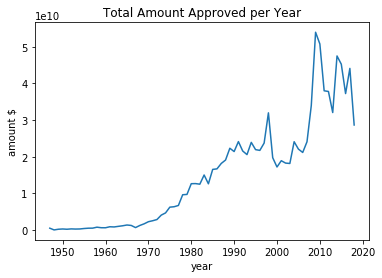

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#  Make a visualization with year on the x-axis and the sum of the totalamt columns per year on the y-axis
year_sum = df_projects.groupby('approvalyear').totalamt.sum()
plt.plot(year_sum)
plt.xlabel('year')
plt.ylabel('amount $')
plt.title('Total Amount Approved per Year');